<a href="https://colab.research.google.com/github/FranPolo25/Kaggle-Employee-Atrittion/blob/main/Reto_Modulo8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Diplomado de Data Science & Artificial Intelligence
##Módulo de Aprendizaje Supervisado
###Actividad de Reto (Francisco Polo)

El nivel de satisfacción y/o desercción de los empleados es una de las problemáticas actuales que más duelen a
las empresas. El costo de capacitación y rotación de personal llega a generar costos muy altos

Abordaremos este reto como un problema de
clasificación, donde la variable de salida es
Attrition_rate.

La variable de salida Attrition_rate es
binaria y tiene los niveles 0 y 1, donde 1
indica que el empleado abandonó la
empresa y 0 que no la ha abandonado.


El objetivo de este reto es generar un modelo
de clasificación que ayude a predecir si
bajo las condiciones actuales de trabajo en
las que se encuentra un empleado, es o no
viable que deserte o renuncie.

In [ ]:
# Importar la biblioteca para análisis de datos
import numpy as np
# Importar la biblioteca para graficación
import matplotlib.pyplot as plt
%matplotlib inline
# Importar la biblioteca para manipulación y tratamiento de datos
import pandas as pd
# Comenzamos con la importación de google drive para poder acceder a nuestros archivos en donde buscaremos nuestras bases de datos a trabajar
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Lectura y preprocesamiento del conjunto de datos

In [ ]:
# Crea un dataframe con el conjunto de datos sobre deserción laboral de empleados
# "Kaggle_Employee_Attrition.csv"
df = pd.read_csv("/content/drive/MyDrive/Data Science/Archivos Excel/Kaggle-Employee-Attrition.csv") #Definimos un dataframe llamado como df para el conjunto de datos sobre el abandono de empleados

# Despliega las primeras 5 líneas del dataframe
df.head(5) #Podemos observar algunas de las 35 columnas y los primeros 5 valores almacenados en cada una de ellas

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Despliega un resumen conciso de la información (las 35 columnas, tipos, etc)
# Contenida en el dataframe.
df.info()
# Podemos observar que es un dataframe de 35 columnas x 1470 filas, en donde tenemos tanto tipos de datos numericos como categóricos/objetos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# Desplegar la cantidad de valores distintos en cada columna de datos
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [ ]:
# Revisamos que nuestro dataFrame no contenga ningún valor nulo que pueda afectar nuestro procedimiento y resultados
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
# Elimina los predictores (columnas) que tengan un solo valor o un valor distinto
# Para todas las entradas (renglones)
df2 = df.drop(columns=['EmployeeCount', 'Over18', 'PerformanceRating', 'StandardHours'])
# Eliminaremos las columnas de EmployeeCount, Over18, PerformanceRating, StandardHours ya que solo existe un único valor o 2 valores distintos en cada columna, por otro lado las variables de Gender, OverTIme y Attrition que a pesar de solo tener dos valores distintos las conservaremos porque el género de una persona nos puede ayudar con información importante para determinar si renuncia del empleado, también dejaremos la variable de OverTime ya que influye mucho en la toma de decisión de buscar otro empleo y Attrition la conservaremos porque es nuestra variable de estudio
# Despliega un resumen conciso de la información en el dataframe resultante
df2.info()
# Podemos observar que las variables/columnas de 'EmployeeCount', 'Gender', 'Over18', 'PerformanceRating', 'StandardHours' fueron eliminadas de nuestro nuevo dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

###One Hot Encoding

In [ ]:
# Buena noticia!! Todos los datos ordinales ya se tradujeron a números enteros que reflejan el orden y por lo tanto no se tienen que transformar.
# Codificar todos los datos categóricos (Tipo 'object') creando variables dummy para sus valores
# Las variables/columnas que tienen tipo objeto y con la cantidad de valores unicos son:
# Attrition 2, BusinessTravel 3, Department 3, EducationField 6, Gender 2, JobRole 9, MaritalStatus 3, Over18 1 (Fue eliminada anteriormente), OverTime 2
df3 = pd.get_dummies(df2,columns=['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']) # Crearemos variables dummy utilizando One hot encoding
# Despliega un resumen conciso de la información en el dataframe resultante
df3.head()
# Despues de realizar el one hot encoding pasamos de tener un total de 35 columnas a tener 53 columnas ya que este proceso divide los valores unicos en distintas columnas

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,2,3,61,2,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,4,92,2,1,3,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,5,4,56,3,1,3,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,7,1,40,3,1,2,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
# Elimina una variable dummy para cada predictor originalmente dicotómico (columna que tenía dos valores) y renombra la columna que permanece con su nombre original.
# Para el resto de las variables dicotónicas pueden eliminar la columna que ustedes quieran.
df3 = df3.drop(columns=['Attrition_No', 'OverTime_No', 'Gender_Female', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'EducationField_Other', 'JobRole_Sales Representative', 'MaritalStatus_Divorced']) #Eliminaremos una variable de las nuevas obtenidas mediante el one hot encoding para cada categoria
# La columna Attrition_Yes debe mantenerse y renombrarse como Attrition.
df3 = df3.rename(columns={'Attrition_Yes': 'Attrition'})
# Despliega un resumen conciso de la información en el dataframe resultante
df3.head()
# Podemos observar que pasamos de un total de columnas/variables de 53 a tener 45 por la eliminación que hicimos hace unos momentos

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,...,0,0,0,0,0,0,1,0,1,1
1,49,279,8,1,2,3,61,2,2,2,...,0,0,0,0,0,1,0,1,0,0
2,37,1373,2,2,4,4,92,2,1,3,...,0,1,0,0,0,0,0,0,1,1
3,33,1392,3,4,5,4,56,3,1,3,...,0,0,0,0,0,1,0,1,0,1
4,27,591,2,1,7,1,40,3,1,2,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
# Normaliza los datos utilizando el escalador de tu preferencia
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
dataScaled = RobustScaler(); # Normalización de los datos mediante el escalador robusto o RobustScaler
scaler = dataScaled.fit(df3) # Versión entrenada, saca la media y varianza de cada columna y junta los datos
dataScaled = scaler.transform(df3) # Escalamos los datos ya entrenados
# Muestra el arreglo resultante
dataScaled

array([[ 0.38461538,  0.43352601, -0.5       , ...,  0.        ,
         1.        ,  1.        ],
       [ 1.        , -0.75578035,  0.08333333, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.07692308,  0.82514451, -0.41666667, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [-0.69230769, -0.9349711 , -0.25      , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.        ,  0.31936416, -0.41666667, ...,  1.        ,
         0.        ,  0.        ],
       [-0.15384615, -0.25144509,  0.08333333, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
# Crea un dataframe con los datos normalizados
data = pd.DataFrame(dataScaled) # Dataframe nuevo con los datos normalizados
data.columns = df3.columns # Nombramiento de las columnas del nuevo dataframe con el orden de las columnas del dataframe anterior

# Despliega las primeras 5 líneas del dataframe
data.head() #Lo vamos a utilizar para entrenar nuestros modelos

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.384615,0.433526,-0.500000,-0.5,-0.957727,-0.5,0.783217,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,1.000000,-0.755780,0.083333,-1.0,-0.956787,0.0,-0.139860,-1.0,0.0,-0.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.076923,0.825145,-0.416667,-0.5,-0.954908,0.5,0.727273,-1.0,-0.5,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,-0.230769,0.852601,-0.333333,0.5,-0.953969,0.5,-0.279720,0.0,-0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,-0.692308,-0.304913,-0.416667,-1.0,-0.952090,-1.0,-0.727273,0.0,-0.5,-0.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Muestra los primeros 5 valores de la columna 'Attrition'
data['Attrition'].head(5)

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Attrition, dtype: float64

## Creación de conjuntos de entrenamiento y prueba

In [ ]:
# Crea los conjuntos de entrenamiento (80%) y prueba (20%), recuerda que la variable a predecir es 'Attrition'
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data, test_size=0.2, random_state=123)

X_train, y_train = train_df.drop(columns=["Attrition"], axis=1), train_df["Attrition"] # Datos de entrada y salida de entrenamiento
X_test, y_test = test_df.drop(columns=["Attrition"], axis=1), test_df["Attrition"] # Datos de entrada y salida de prueba

# Despliega los tamaños de los conjuntos
print("Datos de entrenamiento=", X_train.shape, y_train.shape)
print("Datos de prueba=", X_test.shape, y_test.shape)
# Los datos de validacion vienen dentro de los datos de entrenamiento porque haremos validación cruzada después.
# De acuerdo con los resultados obtenidos podemos ver que tenemos el 80% de los datos de entrenamiento 1470*0.8=1176, mientras que el otro 20% esta destinado para los datos de prueba 1470*0.2=294 y con 44 columnas ya que elimina nuestra columna de Attrition

Datos de entrenamiento= (1176, 44) (1176,)
Datos de prueba= (294, 44) (294,)


## Creación de Modelos de Aprendizaje

### Bosque Aleatorio

In [ ]:
# Crea un Bosque Aleatorio con hiperparámetros por omisión (sin argumentos) y utiliza validación cruzada de 10 folds para evaluar su desempeño promedio
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rfcInicial_model = RandomForestClassifier() # Omisión de hiperparametros
scores = pd.DataFrame(cross_validate(rfcInicial_model, X_train, y_train, cv=10, return_train_score=True)) # Creación de dataframe que nos de el cross validación, con 10 folds (en caso de no ponerlo es default de 5)

# Despliega los score promedio de entrenamiento y validación, así como los resultados obtenidos para cada uno de los 10 folds
print("score promedio de entrenamiento = ", scores['train_score'].mean())
print("score promedio de validación = ", scores['test_score'].mean())
scores
# Es el resultado de la validacion cruzada, de los 10 folds, test_score y train_score el promedio de esos valores son los valores impresos en texto
# Podemos observar que tememos un valor promedio de entrenamiento de 1 ya que no dimos un valor de estimación de arboles y de profundidad o ramas (n_estimators=default, max_depth=default) al momento de realizar el bosque aleatorio y una validación de 84.27%

score promedio de entrenamiento =  1.0
score promedio de validación =  0.842706069824714


,fit_time,score_time,test_score,train_score
0,0.206917,0.011315,0.855932,1.0
1,0.193051,0.011017,0.822034,1.0
2,0.191778,0.011271,0.830508,1.0
3,0.198886,0.011714,0.830508,1.0
4,0.194241,0.011123,0.855932,1.0
5,0.198557,0.011242,0.838983,1.0
6,0.199505,0.011283,0.837607,1.0
7,0.198781,0.011587,0.863248,1.0
8,0.192095,0.012339,0.854701,1.0
9,0.205217,0.011342,0.837607,1.0


In [ ]:
# Determina, entre algunas alternativas, los mejores valores para 2 o más hiperparámetros para construir un Bosque Aleatorio para el problema
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 3, 5, 7], # Diccionario de python con los hiperparametros a explorar, arboles con 2,3,4,5 ramas
              'max_features': ['sqrt', 'log2', None], # Feature a implementar opciones: raíz cuadrada, logaritmo, ninguna de las anteriores
              'n_estimators': [10, 30, 60, 100]} # Un rango de estimaciones a utilizar
rfc_grid = GridSearchCV(RandomForestClassifier(random_state=1), param_grid = parameters, # Todas las combinaciones posibles para la validación cruzada
                        return_train_score=True)
rfc_grid.fit(X_train, y_train)

# Despliega los mejores hiperparámetros encontrados
print("Mejores hiperparámetros\n",rfc_grid.best_params_)
# Nos menciona que una profundidad de 7, none max_feature que se refiere a usa todas las features y 30 arboles

Mejores hiperparámetros
 {'max_depth': 7, 'max_features': None, 'n_estimators': 30}


In [ ]:
# Quédate con el Bosque Aleatorio con los mejores hiperparámetros encontrados y despliega su score con los datos del conjunto de prueba.
rfc_model = rfc_grid.best_estimator_
rfc_model.score(X_test, y_test)

# ¿Este modelo parece mejor que el obtenido con los hiperparámetros por omisión? Si
# Recuerda que ese modelo se evaluó con los conjuntos de validación de la validación cruzada, por lo que podría comportarse peor con el conjunto de prueba.

# Comparando los resultados podemos ver que obtenemos un 89.115% mientras que en el anterior obtuvimos un 84.27%, por lo que vemos una mejoría en los resultados con el último procedimiento realizado, además de que este último contiene el mejor hiperparámetro posible a implementar de acuerdo con los valores introducidos de max_depth, max_features, n_estimators por lo cual es más específico y mejor detallado

0.891156462585034

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       256
         1.0       0.80      0.21      0.33        38

    accuracy                           0.89       294
   macro avg       0.85      0.60      0.64       294
weighted avg       0.88      0.89      0.86       294



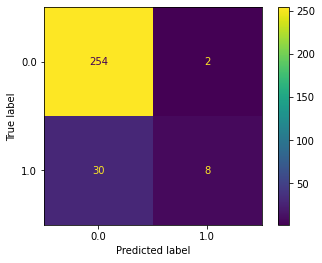

In [ ]:
# Calcula las matriz de confusión y las métricas de evaluación con el conjunto de prueba para el mejor Bosque Aleatorio
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

ConfusionMatrixDisplay.from_estimator(rfc_model, X_test, y_test)
print(classification_report(y_test, rfc_model.predict(X_test)))

In [ ]:
# Contesta las siguientes preguntas:
# (1) ¿Está el conjunto de datos de prueba muy desbalanceado? Justifica levemente.
# Respuesta:
# De acuerdo con la matriz de confusion podemos observar lo siguiente:
#                             Precision   Recall    F1
# Empleado que renuncia:        0.80       0.21     0.33
# Empleado que no renuncia:     0.89       0.99     0.94
# Exactitud del modelo: 0.89
# Estos resultados los podemos interpretar de la siguiente manera:
# Precision: Vemos que tenemos una precision muy parecida en nuestros dos casos, por lo que el porcentaje de acierto, al predecir una clase positiva es muy similar para el metodo utilizado
# Recall: Vemos que tenemos valores muy distintos para nuestros casos, esta metrica nos indica el porcentaje de positivos obtenidos del modelo, por lo que para el caso cuando el empleado no renuncia es mucho mayor con un 0.99 que significa un valor muy elevado que podria mostrar un desbalance en el conjunto de datos de prueba obtenido
# F1: Esta metrica nos ayuda a saber mediante su valor si tenemos una mayor precision o no, por lo cual podemos distinguir una gran diferencia para nuestros casos, para el caso cuando el empleado no renuncia es mucho mayor con un 0.94 que significa un valor muy elevado que podria mostrar un desbalance en el conjunto de datos de prueba obtenido
# Exactitud: Cantidad de predicciones correctas que realiza en modelo, vemos que obtiene una precision bastante buena de 0.89, por lo que podemos decir que el modelo utilizado tiene buena exactitud/precision en cuanto a las predicciones realizadas
# Podemos decir que el conjunto de datos se encuentra muy desbalanceado al obtener recall y f1 muy altos en nuestro caso 0 a comparacion de nuestro caso 1 en cuanto a nuestra variable de estudio attrition
# Ademas podemos observar que de nuestro conjunto de datos de prueba que son 294, 256 o 87.07% de ellos son para empleado que no renuncia, mientras que 38 o 13.26% son para el empleado que renuncia, de acuerdo con nuestros datos obtenidos

# (2) ¿Cómo se equivoca más y cómo se reflejan los erroes en las métricas?
# Respuesta:
# El modelo puede llegarse a equivocar más cuando no se le introducen los hiperparametros y poder encontrar los mejores hiperparametros para implementar nuestro modelo, tambien
# Podemos observar en la matriz de confusión que de 254+2=256 debian ser falsos (empleados que no renuncian), 254 los identifica correctamente y 2 de ellos los identifica erroneamente
# Podemos observar en la matriz de confusión que de 30+8=38 empleados que renuncian, 30 de ellos no renuncian y 8 de ellos renuncian
# El 80% de los que renuncian si renuncian, el 21% de los que renuncian si los identifica bien, el 89% de los que renuncian y no renuncian los clasifica correctamente

### Regresión Logística

In [ ]:
# Crea una Regresión Logística con hiperparámetros por omisión (sin argumentos) y utiliza validación cruzada de 10 folds para evaluar su desempeño promedio
from sklearn.linear_model import LogisticRegression
lrcInicial_model = LogisticRegression() #Omision de hiperparametros
#lrcInicial_model = LogisticRegression(C=0.001, solver='newton-cg')
scores = pd.DataFrame(cross_validate(lrcInicial_model, X_train, y_train, cv=10, return_train_score=True))

# Despliega los score promedio de entrenamiento y validación, así como los resultados obtenidos para cada uno de los 10 folds
print("score promedio de entrenamiento = ", scores['train_score'].mean())
print("score promedio de validación = ", scores['test_score'].mean())
scores

score promedio de entrenamiento =  0.8918176365690783
score promedio de validación =  0.8775459944951471


,fit_time,score_time,test_score,train_score
0,0.030541,0.002289,0.932203,0.888469
1,0.023387,0.002219,0.855932,0.888469
2,0.029582,0.002135,0.898305,0.889414
3,0.021314,0.002232,0.855932,0.897921
4,0.024307,0.002212,0.881356,0.892250
5,0.025425,0.002262,0.847458,0.892250
6,0.021966,0.002185,0.888889,0.886686
7,0.022052,0.002140,0.846154,0.894240
8,0.021817,0.002145,0.880342,0.895184
9,0.022928,0.002108,0.888889,0.893296


In [ ]:
# Determina, entre algunas alternativas, los mejores valores para 2 o más hiperparámetros para construir una Regresión Logística para el problema
from sklearn.model_selection import RandomizedSearchCV
parameters = {'C': np.logspace(-4, 4, 50),
             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lrc_rand = RandomizedSearchCV(LogisticRegression(random_state=1), n_iter=48,
             param_distributions = parameters,
             return_train_score=True)
lrc_rand.fit(X_train, y_train)

# Despliega los mejores hiperparámetros encontrados
print("Mejores hiperparámetros ", lrc_rand.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs f

Mejores hiperparámetros  {'solver': 'lbfgs', 'C': 0.18420699693267145}


In [ ]:
# Quédate con la Regresión Logística con los mejores hiperparámetros encontrados y despliega su score con los datos del conjunto de prueba.
lrc_model = lrc_rand.best_estimator_
lrc_model.score(X_test, y_test)

# ¿Este modelo parece mejor que el obtenido con los hiperparámetros por omisión? Si
# Recuerda que ese modelo se evaluó con los conjuntos de validación de la validación cruzada, por lo que podría comportarse peor con el conjunto de prueba.

0.9115646258503401

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       256
         1.0       0.77      0.45      0.57        38

    accuracy                           0.91       294
   macro avg       0.85      0.71      0.76       294
weighted avg       0.90      0.91      0.90       294



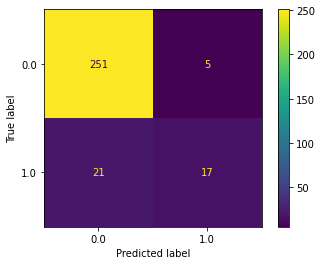

In [ ]:
# Calcula las matriz de confusión y las métricas de evaluación con el conjunto de prueba para la mejor Regresión Logística
ConfusionMatrixDisplay.from_estimator(lrc_model, X_test, y_test)
print(classification_report(y_test, lrc_model.predict(X_test)))

In [ ]:
# Contesta las siguientes preguntas:
# (1) ¿Está el conjunto de datos de prueba muy desbalanceado? Justifica levemente.
# Respuesta:
# De acuerdo con la matriz de confusion podemos observar lo siguiente:
#                             Precision   Recall    F1
# Empleado que renuncia:        0.77       0.45     0.57
# Empleado que no renuncia:     0.92       0.98     0.95
# Exactitud del modelo: 0.91
# Estos resultados los podemos interpretar de la siguiente manera:
# Precision Vemos que tenemos una precision un poco distinta en nuestros dos casos, por lo que el porcentaje de acierto, al predecir una clase es distinta con el metodo utilizado
# Recall: Vemos que tenemos valores muy distintos para nuestros casos, esta metrica nos indica el porcentaje de positivos obtenidos del modelo, por lo que para el caso cuando el empleado no renuncia es mucho mayor con un 0.98 que significa un valor muy elevado que podria mostrar un desbalance en el conjunto de datos de prueba obtenido
# F1: Esta metrica nos ayuda a saber mediante su valor si tenemos una mayor precision o no, por lo cual podemos distinguir una gran diferencia para nuestros casos, para el caso cuando el empleado no renuncia es mucho mayor con un 0.95 que significa un valor muy elevado que podria mostrar un desbalance en el conjunto de datos de prueba obtenido
# Exactitud: Cantidad de predicciones correctas que realiza en modelo, vemos que obtiene una precision bastante buena de 0.91, por lo que podemos decir que el modelo utilizado tiene buena exactitud/precision en cuanto a las predicciones realizadas, mejor que el modelo de bosques utilizado anteriormente
# Podemos decir que el conjunto de datos se encuentra muy desbalanceado al obtener recall y f1 muy altos en nuestro caso 0 a comparacion de nuestro caso 1 en cuanto a nuestra variable de estudio attrition
# Ademas podemos observar que de nuestro conjunto de datos de prueba que son 294, 256 o 87.07% de ellos son para empleado que no renuncia, mientras que 38 o 13.26% son para el empleado que renuncia, de acuerdo con nuestros datos obtenidos

# (2) ¿Cómo se equivoca más y cómo se reflejan los erroes en las métricas?
# Respuesta:
# El modelo puede llegarse a equivocar más cuando no se le introducen los hiperparametros y poder encontrar los mejores hiperparametros para implementar nuestro modelo, tambien
# Podemos observar en la matriz de confusión que de 251+5=257 debian ser falsos (empleados que no renuncian), 251 los identifica correctamente y 5 de ellos los identifica erroneamente
# Podemos observar en la matriz de confusión que de 21+17=38 empleados que renuncian, 21 de ellos no renuncian y 17 de ellos renuncian
# El 77% de los que renuncian si renuncian, el 45% de los que renuncian si los identifica bien, el 91% de los que renuncian y no renuncian los clasifica correctamente

### Bayes Ingenuo Gaussiano

In [ ]:
# Crea un modelo Gaussian Naïve Bayes con hiperparámetros por omisión (sin argumentos) y utiliza validación cruzada de 10 folds para evaluar su desempeño promedio
from sklearn.naive_bayes import GaussianNB
gnbc_model = GaussianNB() #Omision de hiperparametros
scores = pd.DataFrame(cross_validate(gnbc_model, X_train, y_train, cv=10, return_train_score=True))

# Despliega los score promedio de entrenamiento y validación, así como los resultados obtenidos para cada uno de los 10 folds
print("score promedio de entrenamiento = ", scores['train_score'].mean())
print("score promedio de validación = ", scores['test_score'].mean())
scores

score promedio de entrenamiento =  0.5937191522479923
score promedio de validación =  0.5877009995654066


,fit_time,score_time,test_score,train_score
0,0.003398,0.003673,0.677966,0.630435
1,0.002262,0.001313,0.644068,0.617202
2,0.002195,0.001308,0.618644,0.621928
3,0.002121,0.001315,0.296610,0.386578
4,0.002184,0.001338,0.550847,0.608696
5,0.002167,0.001568,0.601695,0.620983
6,0.002753,0.001581,0.675214,0.613787
7,0.002086,0.001316,0.521368,0.614731
8,0.002713,0.001397,0.666667,0.623229
9,0.002122,0.001639,0.623932,0.599622


              precision    recall  f1-score   support

         0.0       0.94      0.58      0.72       256
         1.0       0.21      0.76      0.33        38

    accuracy                           0.61       294
   macro avg       0.58      0.67      0.53       294
weighted avg       0.85      0.61      0.67       294



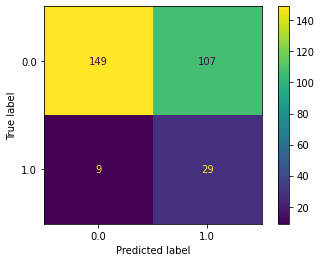

In [ ]:
# Calcula las matriz de confusión y las métricas de evaluación con el conjunto de prueba para el modelo de Bayes Ingenuo Gaussiano
gnbc_model.fit(X_train, y_train) # No se ha entrenado el modelo,
ConfusionMatrixDisplay.from_estimator(gnbc_model, X_test, y_test)
print(classification_report(y_test, gnbc_model.predict(X_test)))

In [ ]:
# Contesta las siguientes preguntas:
# (1) ¿Cómo se equivoca más y cómo se reflejan los errores en las métricas?
# Respuesta:
# De acuerdo con la matriz de confusion podemos observar lo siguiente:
#                             Precision   Recall    F1
# Empleado que renuncia:        0.21       0.76     0.33
# Empleado que no renuncia:     0.94       0.58     0.72
# Exactitud del modelo: 0.61
# Estos resultados los podemos interpretar de la siguiente manera:
# Precision: Vemos que tenemos una precision muy distinta en nuestros dos casos, por lo que el porcentaje de acierto, al predecir una clase positiva es muy dinstinta para el metodo utilizado, una con un valor de 0.94 y la otra con 0.21
# Recall: Vemos que tenemos valores un poco distintos para nuestros casos, esta metrica nos indica el porcentaje de positivos obtenidos del modelo, por lo que para el caso cuando el empleado renuncia es un poco mayor con un 0.76
# F1: Esta metrica nos ayuda a saber mediante su valor si tenemos una mayor precision o no, por lo cual podemos distinguir una gran diferencia para nuestros casos, para el caso cuando el empleado no renuncia es mucho mayor con un 0.72 que significa un valor muy elevado que podria mostrar un desbalance en el conjunto de datos de prueba obtenido
# Exactitud: Cantidad de predicciones correctas que realiza en modelo, vemos que obtiene una precision media ni tan buena ni tan mala de 0.61, por lo que podemos decir que el modelo utilizado tiene una exactitud/precision ni tan buena ni tan mala en cuanto a las predicciones realizadas
# Podemos decir que el conjunto de datos se encuentra muy desbalanceado al obtener f1 muy altos en nuestro caso 0 a comparacion de nuestro caso 1 en cuanto al attrition
# Ademas podemos observar que de nuestro conjunto de datos de prueba que son 294, 256 o 87.07% de ellos son para empleado que no renuncia, mientras que 38 o 13.26% son para el empleado que renuncia, de acuerdo con nuestros datos obtenidos

# El modelo puede llegarse a equivocar más cuando no se le introducen los hiperparametros y poder encontrar los mejores hiperparametros para implementar nuestro modelo, tambien
# Podemos observar en la matriz de confusión que de 149+107=256 debian ser falsos (empleados que no renuncian), 149 los identifica correctamente y 107 de ellos los identifica erroneamente
# Podemos observar en la matriz de confusión que de 9+29=38 empleados que renuncian, 9 de ellos no renuncian y 29 de ellos renuncian
# El 21% de los que renuncian si renuncian, el 76% de los que renuncian si los identifica bien, el 61% de los que renuncian y no renuncian los clasifica correctamente

# (2) Parece que este modelo cree que más empleados van a abandonar la empresa.
# ¿Desde tu perspectiva, qué crees que es mejor para este problema, qué detecte
# pocos de los empleados que si van a abandonar (+ errores tipo 2, falsos negativos)
# o que se equivoque más con empleados que no van a abandonar (+ errores tipo 1,
# falsos positivos)? Justifica muy brevemente.
# Respuesta:
# Este modelo respecto a los demás, es cierto que cree que más empleados van a renunciar, seríe mejor opcion detectar pocos de los empleados que si van a abandonar, ya que con datos tan bajos el analista podria darse cuenta que deberia utilizar otros metodos para verificar que la informacion sea en cierto modo correcta

### Máquina de Vectores de Soporte

In [ ]:
# Crea una Máquina de Vectores de Soporte con hiperparámetros por omisión (sin argumentos) y utiliza validación cruzada de 10 folds para evaluar su desempeño promedio
from sklearn.svm import SVC

svmc_model = SVC()
scores = pd.DataFrame(cross_validate(svmc_model, X_train, y_train, cv=10, return_train_score=True))

# Despliega los score promedio de entrenamiento y validación, así como los resultados obtenidos para cada uno de los 10 folds
print("score promedio de entrenamiento = ", scores['train_score'].mean())
print("score promedio de validación = ", scores['test_score'].mean())
scores

score promedio de entrenamiento =  0.9151556288612686
score promedio de validación =  0.8579892800231782


,fit_time,score_time,test_score,train_score
0,0.052298,0.008634,0.872881,0.908318
1,0.143201,0.050973,0.847458,0.920605
2,0.029444,0.006194,0.864407,0.909263
3,0.029238,0.006080,0.830508,0.919660
4,0.029974,0.006039,0.864407,0.918715
5,0.029554,0.007089,0.872881,0.921550
6,0.029428,0.005917,0.863248,0.915014
7,0.028214,0.006006,0.863248,0.915958
8,0.029125,0.006036,0.854701,0.910293
9,0.030105,0.006049,0.846154,0.912181


In [ ]:
# Determina, entre algunas alternativas, los mejores valores de hiperparámetros para construir una Máquina de Vectores de Soporte para el problema
parameters = {'C': [0.01, 0.1, 1, 10, 50],
             'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svmc_grid = GridSearchCV(SVC(random_state=1), param_grid = parameters,
                return_train_score=True)
svmc_grid.fit(X_train, y_train)

# Despliega los mejores hiperparámetros encontrados
print("Mejores hiperparámetros" ,svmc_grid.best_params_)

Mejores hiperparámetros {'C': 1, 'kernel': 'linear'}


In [ ]:
# Quédate con la Máquina de Vectores de Soporte con los mejores hiperparámetros encontrados y despliega su score con los datos del conjunto de prueba.
svmc_model = svmc_grid.best_estimator_
svmc_model.score(X_test, y_test)

# ¿Este modelo parece mejor que el obtenido con los hiperparámetros por omisión? Si
# Recuerda que ese modelo se evaluó con los conjuntos de validación de la validación cruzada, por lo que podría comportarse peor con el conjunto de prueba.

0.9047619047619048

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       256
         1.0       0.69      0.47      0.56        38

    accuracy                           0.90       294
   macro avg       0.81      0.72      0.75       294
weighted avg       0.90      0.90      0.90       294



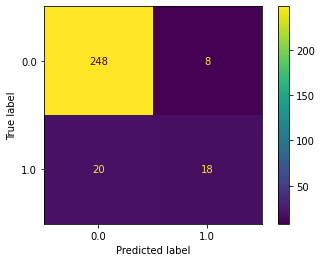

In [ ]:
# Calcula las matriz de confusión y las métricas de evaluación con el conjunto de prueba para la mejor Máquina de Vectores de Soporte
ConfusionMatrixDisplay.from_estimator(svmc_model, X_test, y_test)
print(classification_report(y_test, svmc_model.predict(X_test)))

In [ ]:
# Contesta las siguientes preguntas:
# (1) ¿Por qué parece ser mejor la SVM que el Bosque Aleatorio en términos delas métricas de evaluación?
# Respuesta:
# De acuerdo con la matriz de confusion de bosques aleatorios:
#                             Precision   Recall    F1
# Empleado que renuncia:        0.80       0.21     0.33
# Empleado que no renuncia:     0.89       0.99     0.94
# Exactitud del modelo: 0.89
# Comparando el modelo de SVM con el bosque aleatorio sobre las metricas de evaluacion podemos ver que ambos son muy similares en cuanto a los resultados obtenidos, sin embargo el SVM tiene una mejor exactitud y una mejor precision, tambien denota el desbalanceo en nuestro conjunto de datos, por lo que podemos decir que tiene mejores valores en sus metricas

# De acuerdo con la matriz de confusion de SVM podemos observar lo siguiente:
#                             Precision   Recall    F1
# Empleado que renuncia:        0.69       0.47     0.56
# Empleado que no renuncia:     0.93       0.97     0.95
# Exactitud del modelo: 0.90
# Estos resultados los podemos interpretar de la siguiente manera:
# Precision: Vemos que tenemos una precision muy distinta en nuestros dos casos, por lo que el porcentaje de acierto, al predecir una clase positiva es muy disinta para el metodo utilizado
# Recall: Vemos que tenemos valores muy distintos para nuestros casos, esta metrica nos indica el porcentaje de positivos obtenidos del modelo, por lo que para el caso cuando el empleado no renuncia es mucho mayor con un 0.97 que significa un valor muy elevado que podria mostrar un desbalance en el conjunto de datos de prueba obtenido
# F1: Esta metrica nos ayuda a saber mediante su valor si tenemos una mayor precision o no, por lo cual podemos distinguir una gran diferencia para nuestros casos, para el caso cuando el empleado no renuncia es mucho mayor con un 0.95 que significa un valor muy elevado que podria mostrar un desbalance en el conjunto de datos de prueba obtenido
# Exactitud: Cantidad de predicciones correctas que realiza en modelo, vemos que obtiene una precision bastante buena de 0.90, por lo que podemos decir que el modelo utilizado tiene buena exactitud/precision en cuanto a las predicciones realizadas
# Podemos decir que el conjunto de datos se encuentra muy desbalanceado al obtener recall y f1 muy altos en nuestro caso 0 a comparacion de nuestro caso 1 en cuanto al attrition
# Ademas podemos observar que de nuestro conjunto de datos de prueba que son 294, 256 o 87.07% de ellos son para empleado que no renuncia, mientras que 38 o 13.26% son para el empleado que renuncia, de acuerdo con nuestros datos obtenidos

# El modelo puede llegarse a equivocar más cuando no se le introducen los hiperparametros y poder encontrar los mejores hiperparametros para implementar nuestro modelo, tambien
# Podemos observar en la matriz de confusión que de 248+8=256 debian ser falsos (empleados que no renuncian), 248 los identifica correctamente y 8 de ellos los identifica erroneamente
# Podemos observar en la matriz de confusión que de 20+18=38 empleados que renuncian, 20 de ellos no renuncian y 18 de ellos renuncian
# El 69% de los que renuncian si renuncian, el 47% de los que renuncian si los identifica bien, el 90% de los que renuncian y no renuncian los clasifica correctamente

# (2) En términos del problema que se quiere predecir ¿crees que sería una mejor
# solución que el Bosque Aleatorio y Bayes Ingenuo Gaussiano? Explica muy brevemente.
# Respuesta:
# Antes de seleccionar un modelo en concreto, seria mejor empezar con utilizar otro conjunto de datos de prueba ya que el que se obtuvo esta desbalanceado y debido a lo mismo afecta un poco a nuestros modelos y resultados
# En cuanto a la seleccion entre el modelo de bosques aleatorios y bayes ingenuo gaussiano, seleccionaria el de bosque aleatorio debido a los resultados obtenidos dentro de este documento, podemos ver que en el primer metodo utilizado tuvimos un accuracy de 0.89 y en el otro fue de 0.61
# Además de que las métricas de precisión, el recall y f1 en el bosques aleatorios es mejor y hace mas notoria el desbalanceo en el conjunto de datos de prueba


## Determinación del Mejor Modelo de Aprendizaje mediante Curva ROC y métrica AUC

<Figure size 432x288 with 0 Axes>

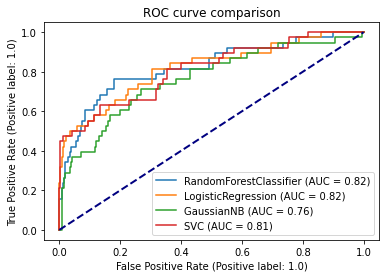

In [ ]:
# Calcular y mostrar las curvas ROC de cada modelo de aprendizaje y sus métricas de área bajo la curva (AUC) sobre el conjunto de prueba
from sklearn.metrics import RocCurveDisplay

plt.figure()
lw = 2
disp = RocCurveDisplay.from_estimator(rfc_model, X_test, y_test)
RocCurveDisplay.from_estimator(lrc_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(gnbc_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(svmc_model, X_test, y_test, ax=disp.ax_)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.title("ROC curve comparison")
plt.legend(loc="lower right")
plt.show()

# **Conclusión**: De acuerdo a las curvas ROC, los modelos de RandomForestClassifier y LogisticRegression fueron los mejores con un AUC de 0.82

La métrica Área Bajo la Curva (AUC) nos ayudará a comparar diferentes modelos o configuraciones. El AUC es precisamente el valor del área que se encuentra abajo de dicha curva ROC, mientras mayor sea el valor de AUC, mejor el modelo obtenido.
